# 1. Business Understanding

## Main Question
Which region in the Czech Republic offers the most advantageous balance between housing costs, crime levels, and average salaries?

## Business Objective
The objective of this analysis is to integrate key socio-economic indicators—real estate prices, crime rates, and regional earnings—into a unified analytical framework. This framework will identify which region offers the most optimal balance between housing affordability (cost per m²), income levels, and overall safety.

## Definition of the “Best Region”
For the purpose of this study, a region is considered optimal if it demonstrates:

- relatively low housing prices (Kč/m²),
- relatively low crime rates,
- relatively high average salary.


## Success Criteria
The analysis is considered successful if it delivers:

- a unified dataset combining housing, crime, and salary metrics,
- a transparent scoring model enabling fair comparison across regions,
- visualisations showing regional differences,
- a final ranking that identifies the most favourable region.

---

# 2. Data Understanding

## 2.1 Overview of Available Datasets
The complete dataset consists of three main sources:

- **Housing prices** — one Excel file per year containing data for all Czech regions,
- **Crime statistics** — one Excel file per region,
- **Salary data** — one Excel file per region.


## 2.2 Data Boundaries and Limitations
Several constraints influence the quality and interpretability of the analysis:

- Not all metrics are available for all years, which limits the reliability of long-term forecasting.
- Approximation models (e.g., regression) may have limited precision due to small sample sizes.

These limitations should be considered when interpreting results, especially predictive components.

## 2.3 Initial Data Exploration
Before cleaning or transforming the data, the housing dataset is inspected to identify:

- true header locations,
- metadata rows,
- footer or technical notes,
- structure consistency across years.

This preliminary exploration ensures that automated cleaning procedures can be applied uniformly across all files.



In [ ]:
import glob
realestate_files = glob.glob("/content/drive/MyDrive/DATA/realestate/*xlsx")
realestate_files

['/content/drive/MyDrive/DATA/realestate/2020.xlsx',
 '/content/drive/MyDrive/DATA/realestate/2021.xlsx',
 '/content/drive/MyDrive/DATA/realestate/2022.xlsx',
 '/content/drive/MyDrive/DATA/realestate/2023.xlsx',
 '/content/drive/MyDrive/DATA/realestate/2019.xlsx']

In [ ]:
import glob
avaragewage = glob.glob("/content/drive/MyDrive/DATA/salary/*xlsx")
avaragewage

['/content/drive/MyDrive/DATA/salary/Praha.xlsx',
 '/content/drive/MyDrive/DATA/salary/Jihočesky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Jihomoravsky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Karlovarský.xlsx',
 '/content/drive/MyDrive/DATA/salary/Vysočina.xlsx',
 '/content/drive/MyDrive/DATA/salary/Královéhradecký.xlsx',
 '/content/drive/MyDrive/DATA/salary/Liberecky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Moravskoslezký.xlsx',
 '/content/drive/MyDrive/DATA/salary/Olomoucky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Pardubickz.xlsx',
 '/content/drive/MyDrive/DATA/salary/Plzensky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Středočesky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Ustecky.xlsx',
 '/content/drive/MyDrive/DATA/salary/Zlínský.xlsx']

In [ ]:
import glob
Crime = glob.glob("/content/drive/MyDrive/DATA/crime/*xlsx")
Crime

['/content/drive/MyDrive/DATA/crime/Praha.xlsx',
 '/content/drive/MyDrive/DATA/crime/Jihocesky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Jihomoravsky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Karlovarsky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Vusocina.xlsx',
 '/content/drive/MyDrive/DATA/crime/Kralovehradecky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Liberecky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Moravskoslezky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Olomoucky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Pardubicky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Plzensky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Stredocesky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Ustecky.xlsx',
 '/content/drive/MyDrive/DATA/crime/Zlinsky.xlsx']

### Structure of the Real Estate Files

Each yearly real-estate file (2019–2023) from the Czech Statistical Office follows a similar internal structure:

- several metadata rows at the top (descriptions, notes, source),
- one header row containing the main columns, such as  
  **"Období"**, **"Území"**, **"Rodinné domy (Kč za m²)"**, **"Byty (Kč za m²)"**,  
- data rows listing all Czech regions (kraje),
- footer rows with additional technical information.

Because the actual header is *not in the first row*, each file must first be loaded **without a header**.  
The row containing the true column names is then detected (the one where "Období" and "Území" appear).  
All rows above and below the main table (metadata and footers) are removed.

After cleaning, each file provides a consistent set of variables:
| Column         | Meaning                          |
| -------------- | -------------------------------- |
| Year           | Year of measurement              |
| Region         | Name of Czech region             |
| house_price_m2 | Average CZK/m² for family houses |
| flat_price_m2  | Average CZK/m² for flats         |
| Avg_salary_FTE | Average salary                   |
| Crime_total    | Total number of crimes           |

The cleaned tables from all years are finally combined into one multi-year dataset.


In [ ]:
import pandas as pd

data = pd.read_excel("/content/drive/MyDrive/DATA/realestate/2021.xlsx", header=None)
data.head(100)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Data z Veřejné databáze ČSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Průměrné kupní ceny nemovitostí - územní srov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Zdroj dat: data ČÚZK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Období,Území,Rodinné domy\n(Kč za m2),v tom podle velikosti obce,NaN,NaN,NaN,Byty\n(Kč za m2),v tom podle velikosti obce,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,do 1 999\nobyv.,2 000 - 9 999\nobyv.,10 000 - 49 999\nobyv.,50 000\nobyv. a více,NaN,do 1 999\nobyv.,2 000 - 9 999\nobyv.,10 000 - 49 999\nobyv.,50 000\nobyv. a více
7,NaN,2021,Hlavní město Praha,95870,x,x,x,95870,100809,x,x,x,100809
8,NaN,NaN,Středočeský kraj,58253,53661,67997,54927,55816,46983,31724,43866,47396,59694
9,NaN,NaN,Jihočeský kraj,39495,36349,36610,42509,65467,42169,26967,34409,41004,54131


### Cleaning Real Estate Data

Since all yearly real estate files share the same structure, the next step is to clean them by removing unnecessary header rows, metadata text, and footer information. After identifying the row that contains the actual column names, we extract only the relevant parts of the table — year, region, house price per m², and flat price per m².

Once each file is cleaned individually using the same procedure, all yearly datasets are merged into one consolidated table covering every region across all selected years.


In [ ]:
header_row = data.index[
    data.apply(lambda row: row.astype(str).str.contains("Období").any(), axis=1)
][0]

header_row

header = data.iloc[header_row]
df_clean = data.iloc[header_row+1:].copy()
df_clean.columns = header
df_clean.head()

5,NaN,Období,Území,Rodinné domy\n(Kč za m2),v tom podle velikosti obce,NaN,NaN,NaN,Byty\n(Kč za m2),v tom podle velikosti obce,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,do 1 999\nobyv.,2 000 - 9 999\nobyv.,10 000 - 49 999\nobyv.,50 000\nobyv. a více,NaN,do 1 999\nobyv.,2 000 - 9 999\nobyv.,10 000 - 49 999\nobyv.,50 000\nobyv. a více
7,NaN,2021,Hlavní město Praha,95870,x,x,x,95870,100809,x,x,x,100809
8,NaN,NaN,Středočeský kraj,58253,53661,67997,54927,55816,46983,31724,43866,47396,59694
9,NaN,NaN,Jihočeský kraj,39495,36349,36610,42509,65467,42169,26967,34409,41004,54131
10,NaN,NaN,Plzeňský kraj,39338,35171,36852,42478,69009,42838,28388,35356,37749,53171


In [ ]:
df_clean = df_clean[df_clean["Území"].notna()]
df_clean = df_clean[~df_clean["Území"].astype(str).str.contains("Česká republika", na=False)]
df_clean = df_clean[~df_clean["Území"].astype(str).str.contains("Kód|Zdroj", na=False)]
df_clean.columns
df_clean = df_clean[[
    "Území",
    "Rodinné domy\n(Kč za m2)",
    "Byty\n(Kč za m2)"
]]
df_clean["year"] = 2021

df_clean = df_clean.rename(columns={
    "Území": "region",
    "Rodinné domy\n(Kč za m2)": "house_price_m2",
    "Byty\n(Kč za m2)": "flat_price_m2"
})

df_clean.head()

5,region,house_price_m2,flat_price_m2,year
7,Hlavní město Praha,95870,100809,2021
8,Středočeský kraj,58253,46983,2021
9,Jihočeský kraj,39495,42169,2021
10,Plzeňský kraj,39338,42838,2021
11,Karlovarský kraj,32743,30042,2021


Now that the real estate dataset for one year has been successfully cleaned and transformed into a tidy, structured table, the same procedure can be applied consistently to all remaining yearly files.  

By standardising the cleaning workflow, each dataset—regardless of formatting inconsistencies or metadata placement—can be processed in an identical manner. This ensures uniformity across all years and prevents structural discrepancies during merging.

Once all yearly datasets are cleaned, they are combined into a single consolidated dataset. This unified table contains complete information for every region and year, making it suitable for further analysis, comparison, and mode


In [ ]:
all_years = []

path = "/content/drive/MyDrive/DATA/realestate/"

files = glob.glob(path + "*.xlsx")

for file in files:
    data = pd.read_excel(file, header=None)
    header_row = data.index[data.apply(lambda row: row.astype(str).str.contains("Období").any(), axis=1)][0]
    header = data.iloc[header_row]
    df_clean = data.iloc[header_row+1:].copy()
    df_clean.columns = header
    df_clean = df_clean[df_clean["Území"].notna()]
    df_clean = df_clean[~df_clean["Území"].astype(str).str.contains("Česká republika", na=False)]
    df_clean = df_clean[~df_clean["Území"].astype(str).str.contains("Kód|Zdroj", na=False)]
    df_clean = df_clean[[
        "Území",
        "Rodinné domy\n(Kč za m2)",
        "Byty\n(Kč za m2)"
    ]]
    year = int(file.split("/")[-1].split(".")[0])
    df_clean["Year"] = year

    df_clean = df_clean.rename(columns={
        "Území": "Region",
        "Rodinné domy\n(Kč za m2)": "house_price_m2",
        "Byty\n(Kč za m2)": "flat_price_m2"
    })

    all_years.append(df_clean)


realestate_all = pd.concat(all_years, ignore_index=True)
realestate_all.head(10)



/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

5,Region,house_price_m2,flat_price_m2,Year
0,Hlavní město Praha,79703,85784,2020
1,Středočeský kraj,47670,37326,2020
2,Jihočeský kraj,33414,32986,2020
3,Plzeňský kraj,32923,34071,2020
4,Karlovarský kraj,28661,23707,2020
5,Ústecký kraj,28258,23343,2020
6,Liberecký kraj,34316,31559,2020
7,Královéhradecký kraj,32374,32113,2020
8,Pardubický kraj,30526,35067,2020
9,Kraj Vysočina,30393,32865,2020


The combined table now includes data for all regions across the last five years. This gives us a clean, unified dataset that we can use for the next steps of the analysis. With this structure in place, it becomes much easier to later add salary and crime data.

The next step is to clean the remaining datasets (salary and crime) using a similar method as we used for the real estate data. This will make sure all datasets have the same format and can be merged without issues.


In [ ]:
import pandas as pd

df_salary = pd.read_excel("/content/drive/MyDrive/DATA/salary/Jihočesky.xlsx", header=None)

df_salary.head(10)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5
0,Data z Veřejné databáze ČSU,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Počet zaměstnanců a průměrné hrubé měsíční mzd...,NaN,NaN,NaN,NaN
3,NaN,kraje - období od roku 2011,NaN,NaN,Území: [2],Jihočeský kraj
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,,Průměrný evidenční počet\nzaměstnanců\n(přepoč...,Průměrná měsíční mzda\n(na přepočtené počty\nz...,Průměrný evidenční počet\nzaměstnanců\n(fyzický),Průměrná měsíční mzda\n(na fyzické osoby)
6,NaN,NaN,v tis.osob,v Kč,v tis.osob,v Kč
7,NaN,2024 [3],221.236202,41746.129115,232.264864,39763.892464
8,NaN,2023,218.102563,39079.638595,227.407458,37480.605978
9,NaN,2022,218.733562,36534.345393,228.437305,34982.410097


The salary dataset has a different structure than the real estate data. It includes values going back to 2011, but for our analysis we only need the years that match the real estate dataset, which starts in 2019. Because of this, we extract only the salary data from 2019 onwards. After that, we link each salary record to the correct region and year so the datasets can be combined later without problems.


In [ ]:
import pandas as pd

salary = pd.read_excel(
    "/content/drive/MyDrive/DATA/salary/Jihočesky.xlsx",
    header=None,
    skiprows=5
)

salary = salary.dropna(how="all")


salary['Year'] = salary.iloc[:, 1].astype(str).str.extract(r'(\d{4})', expand=False)


salary['Year'] = pd.to_numeric(salary['Year'], errors='coerce')

salary_subset = salary[['Year', salary.columns[3]]]

salary_subset = salary_subset.rename(columns={salary.columns[3]: 'Avg_salary_FTE'})

salary_subset = salary_subset.dropna(subset=['Year'])

salary_2019 = salary_subset[salary_subset['Year'] >= 2019]

salary_2019.head(10)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Avg_salary_FTE
2,2024.0,41746.129115
3,2023.0,39079.638595
4,2022.0,36534.345393
5,2021.0,35015.694225
6,2020.0,32775.273938
7,2019.0,31310.481602


Now we need to repeat this process for all the other salary files from the remaining regions. By applying the same cleaning steps to each file, we make sure that all the salary data has a consistent structure.

In [ ]:
import pandas as pd
import glob
import os
import numpy as np

path = '/content/drive/MyDrive/DATA/salary/'
files = glob.glob(path + "*.xlsx")

all_regions = []

def extract_region_from_salary(file):
    temp = pd.read_excel(file, header=None, nrows=6)

    row = temp.iloc[3, :]

    vals = row.dropna().tolist()

    region = vals[-1]
    return str(region).strip()


for file in files:
    kraj = extract_region_from_salary(file)

    df = pd.read_excel(file, header=None, skiprows=5)
    df = df.dropna(how="all")

    df['Year'] = df.iloc[:, 1].astype(str).str.extract(r'(\d{4})', expand=False)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    subset = df[['Year', df.columns[3]]].copy()
    subset = subset.rename(columns={df.columns[3]: 'Avg_salary_FTE'})

    subset = subset.dropna(subset=['Year'])
    subset = subset[subset['Year'] >= 2019]

    subset['Region'] = kraj

    all_regions.append(subset)

big_table = pd.concat(all_regions, ignore_index=True)

big_table['Year'] = big_table['Year'].astype(int)
big_table['Avg_salary_FTE'] = big_table['Avg_salary_FTE'].astype(float).round(1)

big_table.head(1000)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

,Year,Avg_salary_FTE,Region
0,2024,58148.8,Hlavní město Praha
1,2023,53063.4,Hlavní město Praha
2,2022,49797.0,Hlavní město Praha
3,2021,47301.0,Hlavní město Praha
4,2020,44939.3,Hlavní město Praha
...,...,...,...
79,2023,38592.3,Zlínský kraj
80,2022,35741.5,Zlínský kraj
81,2021,34373.5,Zlínský kraj
82,2020,31767.5,Zlínský kraj


Now that we have collected and cleaned the salary data, we can combine it into another large dataset. Later, this dataset will be merged together with the real estate and crime data to create one unified table for the whole analysis.

The next step is to work with the last dataset, which contains information about criminality in each region. We will clean it using a similar approach so it matches the structure of the other datasets.


In [ ]:
import pandas as pd


crime_data = pd.read_excel("/content/drive/MyDrive/DATA/crime/Jihocesky.xlsx", header=None, skiprows= 5)


crime_data.head(100)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,,Kriminalita\ncelkem,Obecná\nkriminalita,Hospodářská\nkriminalita,Loupeže,Vloupání do\nbytů a\nrodinných domů,Znásilnění,Vraždy
2,NaN,2000,.,.,.,.,.,.,.
3,NaN,2001,.,.,.,.,.,.,.
4,NaN,2002,.,.,.,.,.,.,.
5,NaN,2003,.,.,.,.,.,.,.
6,NaN,2004,.,.,.,.,.,.,.
7,NaN,2005,16752,12668,2634,185,344,35,5
8,NaN,2006,16106,11777,2336,189,369,28,12
9,NaN,2007,15695,11003,1936,203,380,36,8


This is what our last dataset looks like. Now we need to extract the values we actually need. For our analysis, we only use data from 2019 onwards, and we focus on the total number of criminal offences in each region.


In [ ]:
print(crime_data.shape)
print(crime_data.columns)

crime_data = crime_data.iloc[:,[1, 2]]
crime_data.columns = ["Year", "Crime_total"]
crime_data["Year"] = pd.to_numeric(crime_data["Year"], errors="coerce")
crime_data = crime_data.dropna(subset=["Year"])


crime_data = crime_data[crime_data["Year"] >= 2019]
crime_data.head()


(32, 9)
Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')


,Year,Crime_total
21,2019.0,9229
22,2020.0,7947
23,2021.0,7484
24,2022.0,8916
25,2023.0,8917


Now that we have cleaned and extracted the crime data for one region, we need to apply the same process to all the remaining crime files. After cleaning every region, we can combine them into one final crime dataset.

In [ ]:
import pandas as pd
import glob
import os

path = '/content/drive/MyDrive/DATA/crime/'
files = glob.glob(path + "*.xlsx")

all_regions = []

def extract_region_from_crime(file):
    temp = pd.read_excel(file, header=None, nrows=10)

    for r_idx in range(temp.shape[0]):
        row = temp.iloc[r_idx]
        mask = row.astype(str).str.contains("Území", na=False)

        if mask.any():
            col_idx = mask.idxmax()
            for c in range(col_idx + 1, temp.shape[1]):
                val = row[c]
                if pd.notna(val) and str(val).strip() != "":
                    return str(val).strip()
    return None


for file in files:
    kraj = extract_region_from_crime(file)
    print(f"Soubor: {os.path.basename(file)} → Kraj: {kraj}")

    df = pd.read_excel(file, header=None, skiprows=7)
    df = df.dropna(how="all")

    year_col = (
        df.apply(lambda col: col.astype(str).str.match(r"^\d{4}$", na=False))
          .sum()
          .idxmax()
    )

    crime_col = year_col + 1

    subset = df.iloc[:, [year_col, crime_col]].copy()
    subset.columns = ["Year", "Crime_total"]


    subset["Year"] = pd.to_numeric(subset["Year"], errors="coerce")

    subset = subset.dropna(subset=["Year"])

    subset = subset[subset["Year"] >= 2019]


    subset["Region"] = kraj
    all_regions.append(subset)

crime_data = pd.concat(all_regions, ignore_index=True)
print("\nFinální tvar:", crime_data.shape)
crime_data.head(20)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Praha.xlsx → Kraj: Hlavní město Praha


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Jihocesky.xlsx → Kraj: Jihočeský kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Jihomoravsky.xlsx → Kraj: Jihomoravský kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Karlovarsky.xlsx → Kraj: Karlovarský kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Vusocina.xlsx → Kraj: Kraj Vysočina


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Kralovehradecky.xlsx → Kraj: Královéhradecký kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Liberecky.xlsx → Kraj: Liberecký kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Moravskoslezky.xlsx → Kraj: Moravskoslezský kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Olomoucky.xlsx → Kraj: Olomoucký kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Soubor: Pardubicky.xlsx → Kraj: Pardubický kraj
Soubor: Plzensky.xlsx → Kraj: Plzeňský kraj


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

Soubor: Stredocesky.xlsx → Kraj: Středočeský kraj
Soubor: Ustecky.xlsx → Kraj: Ústecký kraj
Soubor: Zlinsky.xlsx → Kraj: Zlínský kraj

Finální tvar: (84, 3)


,Year,Crime_total,Region
0,2019.0,49863,Hlavní město Praha
1,2020.0,38059,Hlavní město Praha
2,2021.0,35136,Hlavní město Praha
3,2022.0,40704,Hlavní město Praha
4,2023.0,41070,Hlavní město Praha
5,2024.0,38435,Hlavní město Praha
6,2019.0,9229,Jihočeský kraj
7,2020.0,7947,Jihočeský kraj
8,2021.0,7484,Jihočeský kraj
9,2022.0,8916,Jihočeský kraj


Now that we have created the last big dataset, we can move on to the next step, which is merging all three datasets together — real estate, salary, and crime. By combining them into one table, we will have all important information in a single place, making it ready for deeper analysis and comparison between regions.


In [ ]:
df1 = realestate_all
df2 = big_table
df3 = crime_data

merged = df1.merge(df2, on=["Year", "Region"], how="inner")
big_df = merged.merge(df3, on=["Year", "Region"], how="inner")
big_df.head(1000)



,Region,house_price_m2,flat_price_m2,Year,Avg_salary_FTE,Crime_total
0,Hlavní město Praha,79703,85784,2020,44939.3,38059
1,Středočeský kraj,47670,37326,2020,36922.2,18091
2,Jihočeský kraj,33414,32986,2020,32775.3,7947
3,Plzeňský kraj,32923,34071,2020,34961.5,8996
4,Karlovarský kraj,28661,23707,2020,31236.4,4422
...,...,...,...,...,...,...
65,Kraj Vysočina,28721,28385,2019,31697.9,5538
66,Jihomoravský kraj,33430,41092,2019,33548.7,19757
67,Olomoucký kraj,25538,27973,2019,31064.5,9838
68,Zlínský kraj,24666,28421,2019,30659.0,6185


Now we have one big table that contains all the data we need. This combined dataset includes information about real estate prices, salaries, and crime for every region and year. With everything in one place, we can finally start analysing the data and looking for patterns between the regions.


Next, we calculate the average values for each region. By taking the mean of the main indicators, we can create a simpler summary dataset that shows the typical level of housing prices, salaries, and crime for every region. This makes it easier to compare regions before moving on to more advanced analysis.


In [ ]:
agg_df = big_df.groupby("Region").agg({
    "house_price_m2": "mean",
    "Avg_salary_FTE": "mean",
    "Crime_total": "mean"
}).reset_index()

agg_df

,Region,house_price_m2,Avg_salary_FTE,Crime_total
0,Hlavní město Praha,91581.8,47632.62,40966.4
1,Jihomoravský kraj,41935.8,37506.80,17767.0
2,Jihočeský kraj,39208.2,34943.08,8498.6
3,Karlovarský kraj,32602.8,33229.36,4778.2
4,Kraj Vysočina,35530.6,35137.02,5118.4
5,Královéhradecký kraj,38539.0,35901.82,6334.0
6,Liberecký kraj,39663.6,34944.40,7710.4
7,Moravskoslezský kraj,35348.0,34613.10,20966.6
8,Olomoucký kraj,32484.0,34643.24,8869.4
9,Pardubický kraj,35931.8,34366.26,5009.8


Now we will use Hierarchical Agglomerative Clustering to create a dendrogram. We choose the Ward method, which groups regions in a way that keeps the increase of SSE (sum of squared errors) as low as possible.

We use clustering because every region is different, and we want to understand how similar or different the regions are based on housing prices, salaries, and crime. The dendrogram helps us see which regions are close to each other and which ones stand out.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib.pyplot as plt

X = agg_df[["house_price_m2", "Avg_salary_FTE", "Crime_total"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Z = linkage(X_scaled, method="ward", metric="euclidean")



Now we will create dendograme

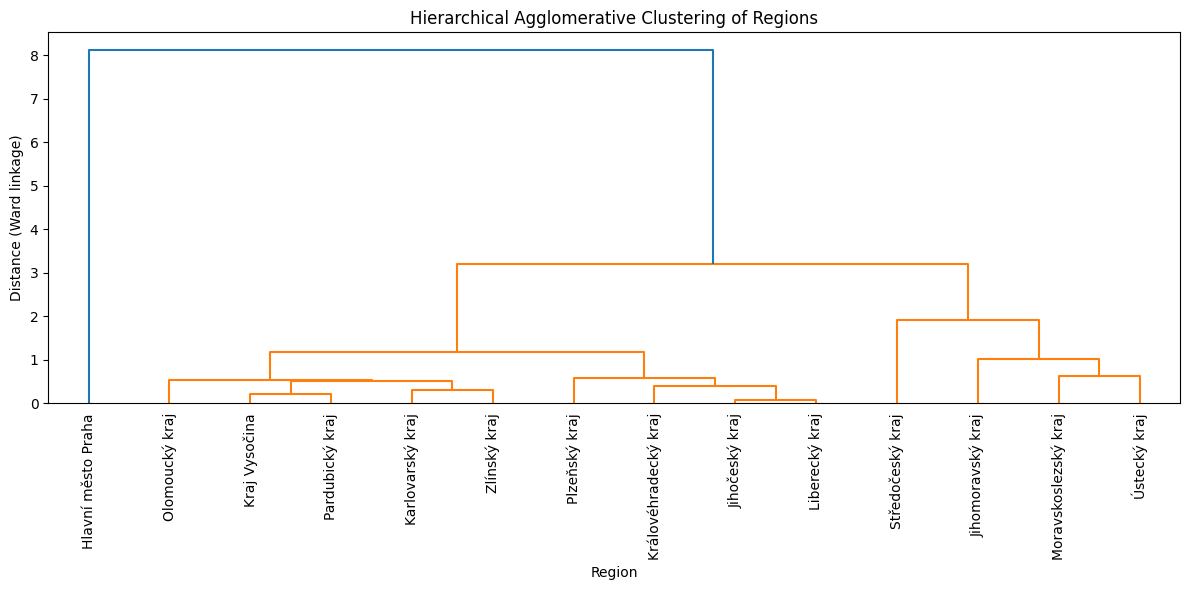

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=agg_df["Region"].values,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("Hierarchical Agglomerative Clustering of Regions")
plt.xlabel("Region")
plt.ylabel("Distance (Ward linkage)")
plt.tight_layout()
plt.show()

In [ ]:
clusters = fcluster(Z, 3, criterion="maxclust")

agg_df["Cluster"] = clusters
print(agg_df[["Region", "Cluster"]].sort_values("Cluster"))

                  Region  Cluster
3       Karlovarský kraj        1
2         Jihočeský kraj        1
5   Královéhradecký kraj        1
4          Kraj Vysočina        1
6         Liberecký kraj        1
10         Plzeňský kraj        1
9        Pardubický kraj        1
8         Olomoucký kraj        1
12          Zlínský kraj        1
11      Středočeský kraj        2
1      Jihomoravský kraj        2
7   Moravskoslezský kraj        2
13          Ústecký kraj        2
0     Hlavní město Praha        3


From the dendrogram, we can see that most regions share very similar characteristics, while Prague stands out as a clear outlier. This indicates that Prague differs significantly from the rest of the regions.

Our next step is to create an index that will help us determine which region performs best overall. To do this, we will build a simple scoring formula that combines the three main factors. The index is calculated as follows:

index = (w1 * salary_norm) – (w2 * house_price_norm) – (w3 * crime_norm)

In this formulation, higher salaries increase the final score, whereas higher housing prices and higher crime levels reduce it. The weights (w1, w2, w3) allow us to adjust the relative importance of each factor.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

cols = ["house_price_m2", "Avg_salary_FTE", "Crime_total"]

scaler = MinMaxScaler()
big_df_scaled = big_df.copy()

big_df_scaled[cols] = scaler.fit_transform(big_df[cols])

big_df_scaled["Quality_Index"] = (
    + big_df_scaled["Avg_salary_FTE"]
    - big_df_scaled["house_price_m2"]
    - big_df_scaled["Crime_total"]
)
ranked = big_df_scaled.groupby("Region")["Quality_Index"].mean().sort_values(ascending=False)

ranked


,Quality_Index
Region,
Kraj Vysočina,0.061351
Zlínský kraj,0.046074
Královéhradecký kraj,0.033596
Pardubický kraj,0.025383
Karlovarský kraj,0.019247
Plzeňský kraj,0.006636
Olomoucký kraj,-0.006324
Liberecký kraj,-0.051105
Jihočeský kraj,-0.062988


Now that we know the Vysočina region ranks as the best area for purchasing a house or flat, we should verify whether this result is consistent over time. Before making a final conclusion, it is important to examine whether Vysočina has always performed the best, or if another region ranked higher in previous years. This will help us understand whether Vysočina is consistently strong or if its position has fluctuated over time.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = big_df.copy()

features = ["house_price_m2", "Avg_salary_FTE", "Crime_total"]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

df["price_norm"]  = df_scaled[:, 0] * -1    # invert -> lower price = better
df["salary_norm"] = df_scaled[:, 1]         # higher salary = better
df["crime_norm"]  = df_scaled[:, 2] * -1    # invert -> lower crime = better

df["quality_index"] = df["price_norm"] + df["salary_norm"] + df["crime_norm"]

df.head()


,Region,house_price_m2,flat_price_m2,Year,Avg_salary_FTE,Crime_total,price_norm,salary_norm,crime_norm,quality_index
0,Hlavní město Praha,79703,85784,2020,44939.3,38059,-2.274631,1.975378,-2.624367,-2.923619
1,Středočeský kraj,47670,37326,2020,36922.2,18091,-0.364638,0.138284,-0.566731,-0.793086
2,Jihočeský kraj,33414,32986,2020,32775.3,7947,0.485387,-0.811966,0.478574,0.151995
3,Plzeňský kraj,32923,34071,2020,34961.5,8996,0.514663,-0.311005,0.370478,0.574136
4,Karlovarský kraj,28661,23707,2020,31236.4,4422,0.768788,-1.164600,0.841813,0.446001


Using All Historical Data Across Multiple Years
We have now incorporated all available historical data by merging the values from each year into one dataset. This means that each region is evaluated not based on a single point in time, but on its performance across multiple years. Working with multi-year data provides a more stable and reliable assessment of how each region scores in terms of salaries, housing prices per m², and crime levels.

This multi-year approach reduces the impact of short-term fluctuations—such as temporary price spikes or one-off crime changes—and allows us to identify regions that consistently achieve favorable results in the balance between income, property affordability, and safety. As a result, our analysis becomes more robust and better reflects long-term trends in these three key indicators.

In [ ]:
mean_quality = (
    df_q.groupby("Region")["quality_index"]
        .mean()
        .sort_values(ascending=False)
)

mean_quality


,quality_index
Region,
Kraj Vysočina,0.835062
Královéhradecký kraj,0.741017
Zlínský kraj,0.730182
Plzeňský kraj,0.672365
Pardubický kraj,0.591457
Karlovarský kraj,0.522764
Olomoucký kraj,0.513088
Liberecký kraj,0.250169
Jihočeský kraj,0.183953


Now that we have used all available years of data, we can view the full historical performance across the last five years.

Based on this analysis, the Vysočina region consistently achieves the best balance of income levels, housing affordability (price per m²), and crime rates over this five-year period.

To make these results easier to interpret, we will visualize them using a heatmap.

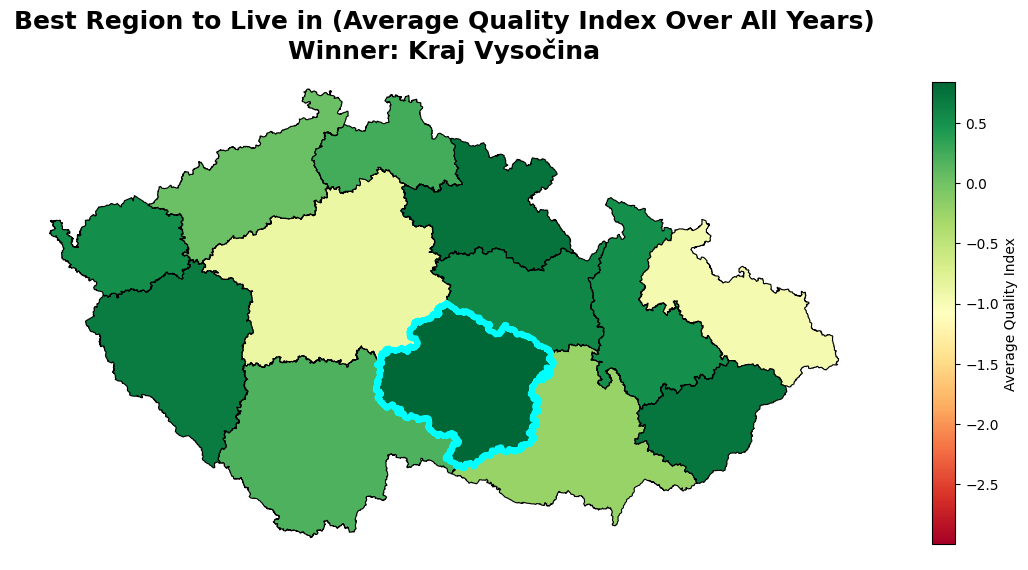

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

df_avg = mean_quality.reset_index()
df_avg.columns = ["Region", "avg_quality_index"]

# ───────────────────────────────────────────────
# Load Czech regions GeoJSON
url = "https://raw.githubusercontent.com/siwekm/czech-geojson/master/kraje.json"
map_df = gpd.read_file(url)


id_to_region = {
    "CZ0100000000": "Hlavní město Praha",
    "CZ0200000000": "Středočeský kraj",
    "CZ0310000000": "Jihočeský kraj",
    "CZ0320000000": "Plzeňský kraj",
    "CZ0410000000": "Karlovarský kraj",
    "CZ0420000000": "Ústecký kraj",
    "CZ0510000000": "Liberecký kraj",
    "CZ0520000000": "Královéhradecký kraj",
    "CZ0530000000": "Pardubický kraj",
    "CZ0630000000": "Kraj Vysočina",
    "CZ0640000000": "Jihomoravský kraj",
    "CZ0710000000": "Olomoucký kraj",
    "CZ0720000000": "Zlínský kraj",
    "CZ0800000000": "Moravskoslezský kraj"
}


map_df["Region"] = map_df["id"].map(id_to_region)


merged = map_df.merge(df_avg, on="Region", how="left")


winner_region = merged.loc[merged["avg_quality_index"].idxmax(), "Region"]

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

merged.plot(
    column="avg_quality_index",
    cmap="RdYlGn",          # Green = best, Red = worst
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Average Quality Index",
        "shrink": 0.6
    }
)

merged[merged["Region"] == winner_region].plot(
    ax=ax,
    edgecolor="cyan",
    linewidth=4,
    facecolor="none"
)

ax.set_title(
    f"Best Region to Live in (Average Quality Index Over All Years)\n"
    f"Winner: {winner_region}",
    fontsize=18,
    fontweight="bold"
)

plt.axis("off")
plt.show()


To understand how the regions might develop in the future, we use linear regression. Linear regression is a predictive method that fits a straight line through the existing data points. The idea is that by observing how a value has changed in the past, we can estimate how it may continue to change in the coming years.

In our analysis, we apply linear regression to each region separately. For every region, we take the historical values (such as house prices, flat prices, salaries, or crime levels) and fit a straight line to them. Based on this fitted line, we can then predict the values for the upcoming years.

This method helps us answer questions such as:

Will house prices continue to rise?

Which region is likely to become more affordable?

How might salaries change in the next few years?

What overall direction is each indicator trending toward?

Linear regression does not capture complex or nonlinear developments, but it provides a clear and easy-to-interpret approximation of long-term trends. It is especially useful when the past data shows a relatively steady direction without extreme fluctuations.

We will start with the price of houses per square meter. By using the data from previous years, we can apply linear regression to estimate how house prices might change in the future. This helps us understand the long-term trend for each region and see which areas are becoming more expensive over time.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

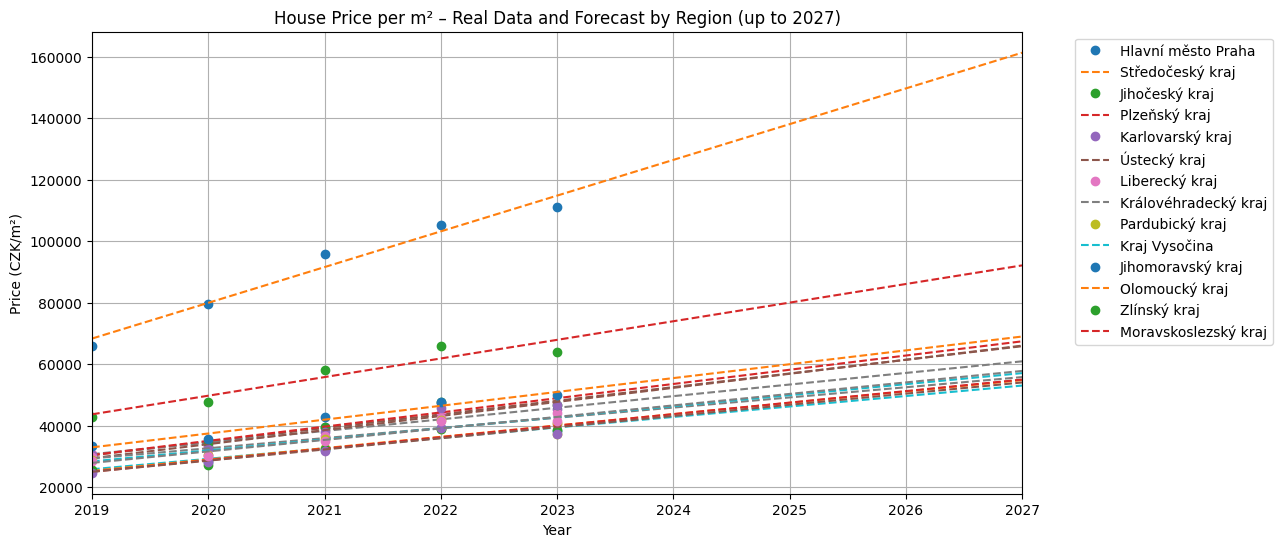

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

future_year = 2027   # forecast horizon

plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    X = df_r[["Year"]]
    y = df_r["house_price_m2"]

    model = LinearRegression().fit(X, y)

    years = np.arange(df_r["Year"].min(), future_year + 1)
    y_pred = model.predict(years.reshape(-1, 1))

    plt.plot(df_r["Year"], df_r["house_price_m2"], "o")

    plt.plot(years, y_pred, "--")

plt.title("House Price per m² – Real Data and Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("Price (CZK/m²)")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


Next, we will continue the analysis by examining the price of flats per square meter. This will allow us to evaluate how flat affordability has changed over time and how it may develop in the future.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

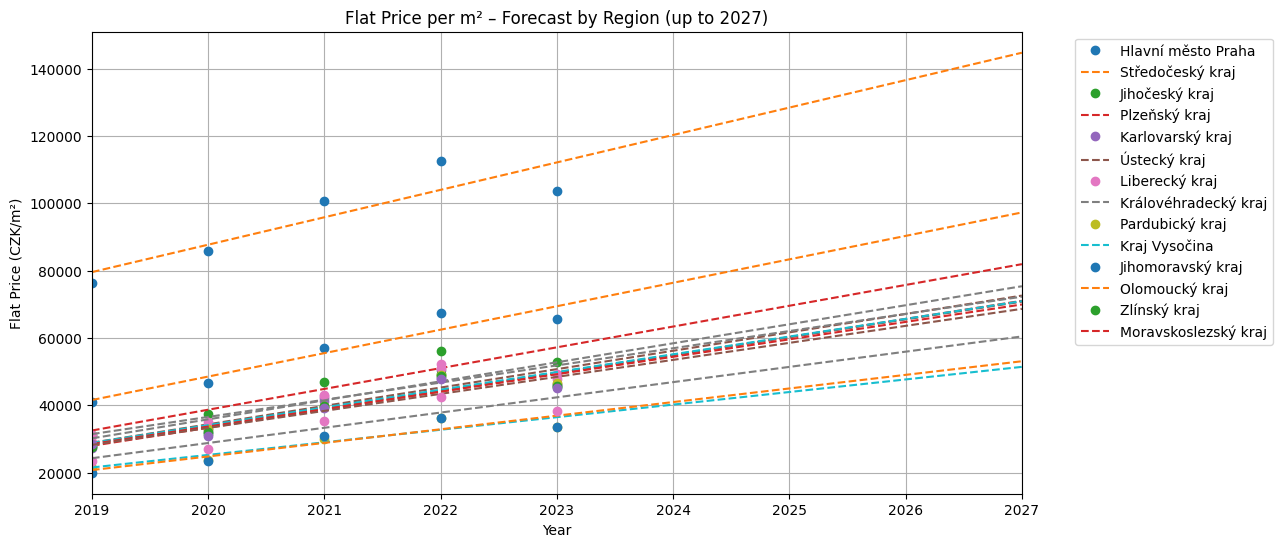

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

future_year = 2027

plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    X = df_r[["Year"]]
    y = df_r["flat_price_m2"]

    model = LinearRegression().fit(X, y)

    years = np.arange(df_r["Year"].min(), future_year + 1)
    y_pred = model.predict(years.reshape(-1, 1))

    plt.plot(df_r["Year"], df_r["flat_price_m2"], "o")

    plt.plot(years, y_pred, "--")

plt.title("Flat Price per m² – Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("Flat Price (CZK/m²)")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


Now we move on to the crime data.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

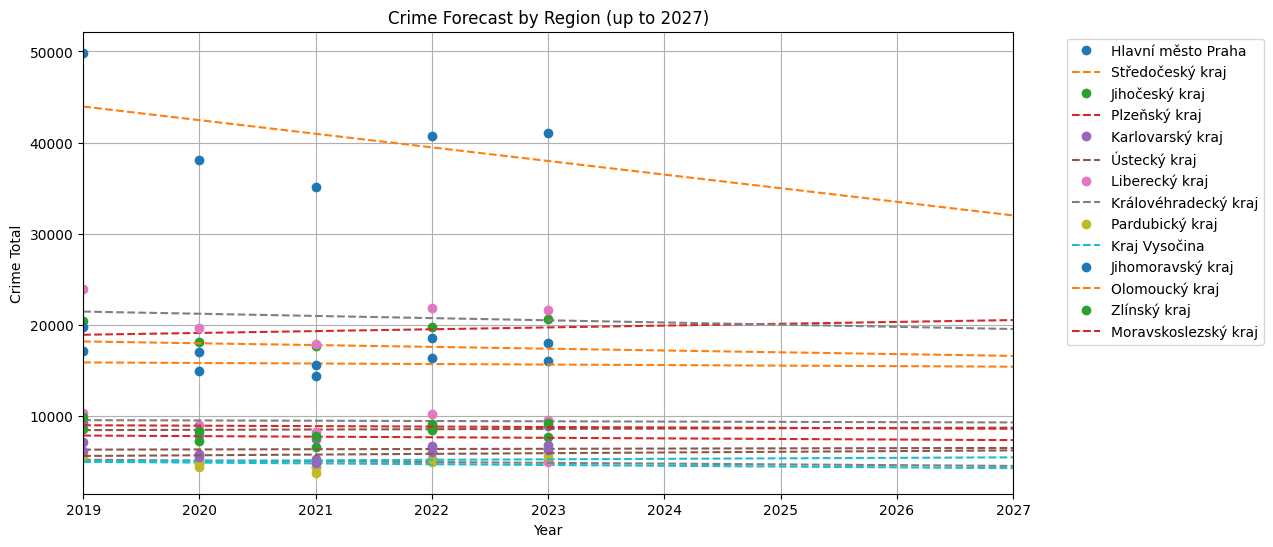

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

future_year = 2027

plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    # Prepare training data
    X = df_r[["Year"]]
    y = df_r["Crime_total"]

    # Train linear regression model
    model = LinearRegression().fit(X, y)

    # Generate future forecast years
    years = np.arange(df_r["Year"].min(), future_year + 1)
    y_pred = model.predict(years.reshape(-1, 1))

    # Plot real data
    plt.plot(df_r["Year"], df_r["Crime_total"], "o")

    # Plot forecast
    plt.plot(years, y_pred, "--")

plt.title("Crime Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("Crime Total")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


Now we move on to the salary data.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

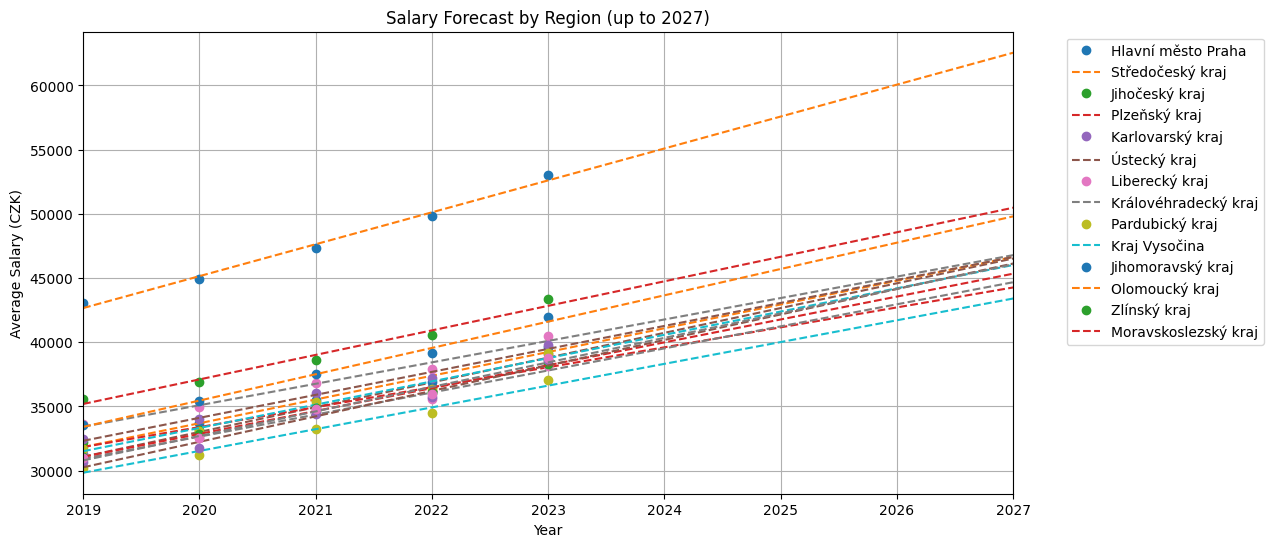

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

future_year = 2027

plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    # Prepare training data
    X = df_r[["Year"]]
    y = df_r["Avg_salary_FTE"]

    # Train linear regression model
    model = LinearRegression().fit(X, y)

    # Generate future forecast years
    years = np.arange(df_r["Year"].min(), future_year + 1)
    y_pred = model.predict(years.reshape(-1, 1))

    # Plot real data
    plt.plot(df_r["Year"], df_r["Avg_salary_FTE"], "o")

    # Plot forecast
    plt.plot(years, y_pred, "--")

plt.title("Salary Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("Average Salary (CZK)")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


Now let's calculate the R² error to see how well our regression models fit the real data. The R² value shows how much of the variation in the data can be explained by the model. A higher R² means the model is more accurate.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

r2_results = []

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    r2_values = []

    for col in ["house_price_m2", "flat_price_m2", "Avg_salary_FTE", "Crime_total"]:

        X = df_r[["Year"]]
        y = df_r[col]

        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)

        r2 = r2_score(y, y_pred)
        r2_values.append(r2)

    r2_results.append({
        "Region": region,
        "Average_R2": sum(r2_values) / len(r2_values)
    })

r2_df = pd.DataFrame(r2_results)

# Sort and show exactly 14 regions
r2_df = r2_df.sort_values("Average_R2", ascending=False).head(14)
r2_df


,Region,Average_R2
0,Hlavní město Praha,0.731037
10,Jihomoravský kraj,0.727870
7,Královéhradecký kraj,0.709418
8,Pardubický kraj,0.708196
9,Kraj Vysočina,0.703609
1,Středočeský kraj,0.701813
11,Olomoucký kraj,0.699403
12,Zlínský kraj,0.692452
4,Karlovarský kraj,0.692025
5,Ústecký kraj,0.691809


The R² scores show how well linear regression fits the historical trends of each region. Regions like Prague, South Moravian, and Hradec Králové have the highest R² values, meaning their data follows a stable and predictable trend. On the other hand, regions with lower R² scores show more variation from year to year, which makes their future values harder to predict.

Now we will try it with polynomial regression, which fits a curved line instead of a straight one. This method can capture more complex patterns in the data, especially if the values do not grow in a perfectly linear way. It basically adds additional curve terms to the model, so the forecast can bend up or down depending on the real trend.

Using polynomial regression, we can check whether the regions show a non-linear trend over time. After this, we can compare the results with the simple linear regression to see which method gives a more realistic prediction.


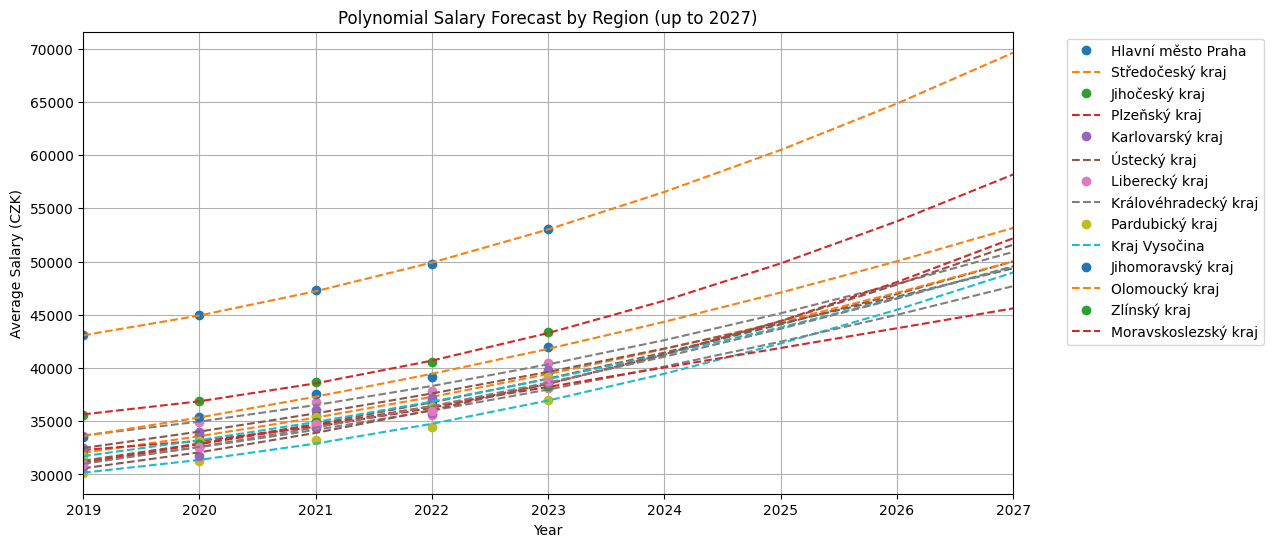

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

future_year = 2027
poly = PolynomialFeatures(degree=2)

plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    X = df_r[["Year"]].values
    y = df_r["Avg_salary_FTE"].values

    # Polynomial regression
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    years = np.arange(df_r["Year"].min(), future_year + 1).reshape(-1,1)
    years_poly = poly.transform(years)
    y_pred = model.predict(years_poly)

    plt.plot(df_r["Year"], df_r["Avg_salary_FTE"], "o")

    plt.plot(years, y_pred, "--")

plt.title("Polynomial Salary Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("Average Salary (CZK)")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


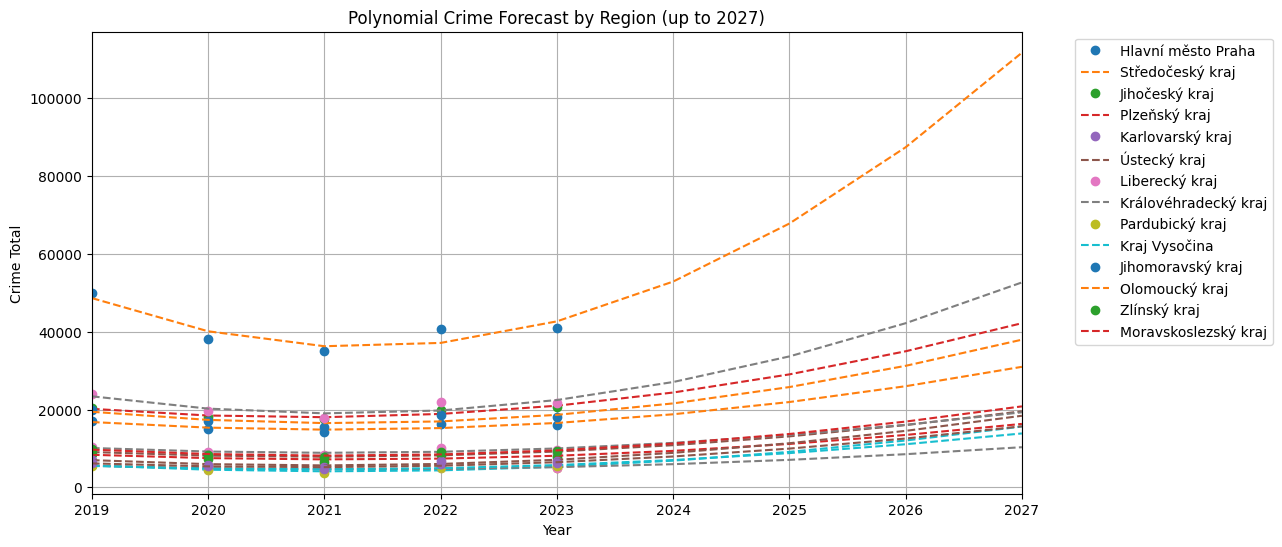

In [ ]:
plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    X = df_r[["Year"]].values
    y = df_r["Crime_total"].values

    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    years = np.arange(df_r["Year"].min(), future_year + 1).reshape(-1,1)
    years_poly = poly.transform(years)
    y_pred = model.predict(years_poly)

    plt.plot(df_r["Year"], df_r["Crime_total"], "o")
    plt.plot(years, y_pred, "--")

plt.title("Polynomial Crime Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("Crime Total")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


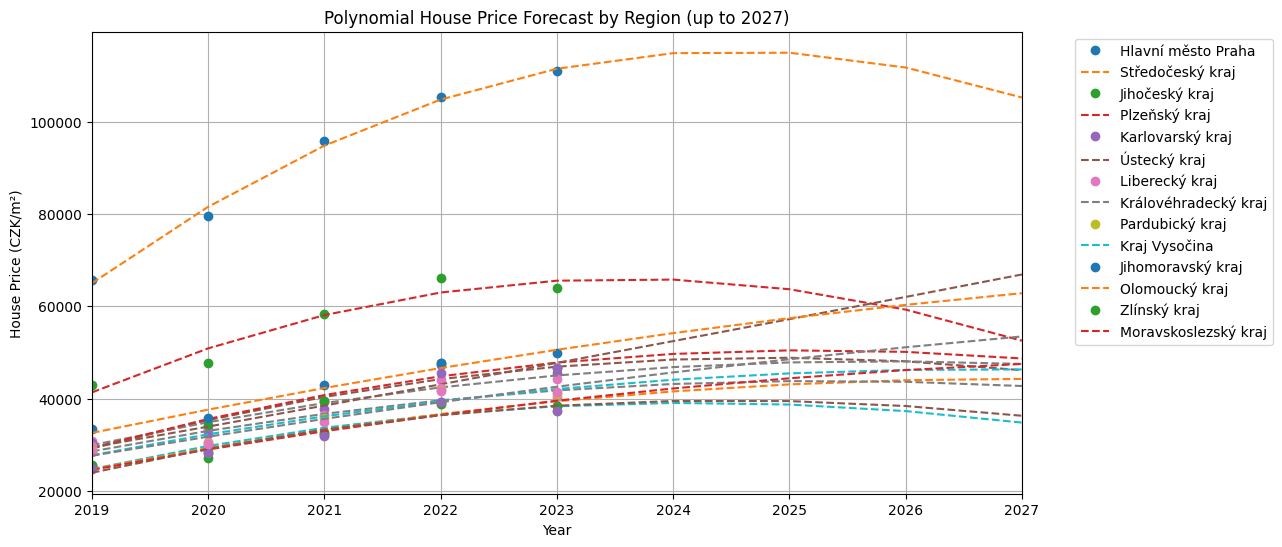

In [ ]:
plt.figure(figsize=(12,6))

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    X = df_r[["Year"]].values
    y = df_r["house_price_m2"].values

    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    years = np.arange(df_r["Year"].min(), future_year + 1).reshape(-1,1)
    years_poly = poly.transform(years)
    y_pred = model.predict(years_poly)

    plt.plot(df_r["Year"], df_r["house_price_m2"], "o")
    plt.plot(years, y_pred, "--")

plt.title("Polynomial House Price Forecast by Region (up to 2027)")
plt.xlabel("Year")
plt.ylabel("House Price (CZK/m²)")
plt.grid(True)
plt.legend(big_df["Region"].unique(), bbox_to_anchor=(1.05,1))
plt.xlim(big_df["Year"].min(), future_year)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

poly = PolynomialFeatures(degree=2)
target_year = 2025

results_2025 = []

for region in big_df["Region"].unique():
    df_r = big_df[big_df["Region"] == region].sort_values("Year")

    X = df_r[["Year"]].values
    y = df_r["Avg_salary_FTE"].values

    # Polynomial model (same as your graph)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    # Predict year 2025
    pred_2025 = model.predict(poly.transform([[target_year]]))[0]

    results_2025.append({
        "Region": region,
        "Salary_2025_polynomial": pred_2025
    })

salary_2025_df = pd.DataFrame(results_2025)
salary_2025_df.sort_values("Salary_2025_polynomial", ascending=False)


,Region,Salary_2025_polynomial
0,Hlavní město Praha,60489.799999
1,Středočeský kraj,49829.959998
10,Jihomoravský kraj,47090.140000
3,Plzeňský kraj,45140.919999
6,Liberecký kraj,44421.579998
12,Zlínský kraj,44409.600000
5,Ústecký kraj,44332.180000
7,Královéhradecký kraj,44185.959999
2,Jihočeský kraj,44101.160000
9,Kraj Vysočina,43825.159999


As we can see, polynomial regression works well mainly for salaries. Salary levels follow a smoother and more consistent trend, so the curve can capture the development more accurately.

However, for crime or other indicators influenced by unpredictable external factors, a polynomial curve does not make sense. Crime is affected by many sudden changes, so trying to fit a smooth curve usually leads to unrealistic results.

For salaries, the model was surprisingly close to reality. For example, in the 1st quarter of 2025, Prague had an average salary of 62,472 Kč, while our polynomial model predicted 60,489.8 Kč — which is a very reasonable approximation.


Now we will find out the absolute winner over the years. For our predictions we use linear regression, because it is more realistic and more stable than polynomial regression. We will create predictions up to the year 2027, and the model will show us the estimated values for that year.

In [ ]:
#  FUTURE INDEX (2024–2027)

future_years = [2024, 2025, 2026, 2027]
future_rows = []

for region, df_r in big_df.groupby("Region"):
    df_r = df_r.sort_values("Year")
    X = df_r[["Year"]].values

    models = {}
    for col in ["house_price_m2", "flat_price_m2", "Avg_salary_FTE"]:
        y = df_r[col].values
        models[col] = LinearRegression().fit(X, y)

    crime_value = df_r["Crime_total"].iloc[-1]

    for year in future_years:
        future_rows.append({
            "Region": region,
            "Year": year,
            "house_price_m2_future": models["house_price_m2"].predict([[year]])[0],
            "flat_price_m2_future": models["flat_price_m2"].predict([[year]])[0],
            "Avg_salary_FTE_future": models["Avg_salary_FTE"].predict([[year]])[0],
            "Crime_total_future": crime_value
        })

pred_df = pd.DataFrame(future_rows)

future_df = (
    pred_df
    .groupby("Region")
    .agg(
        house_price_m2_future=("house_price_m2_future", "mean"),
        flat_price_m2_future=("flat_price_m2_future", "mean"),
        Avg_salary_FTE_future=("Avg_salary_FTE_future", "mean"),
        Crime_total_future=("Crime_total_future", "mean"),
    )
    .reset_index()
)

df_idx = future_df.copy()


for col in ["house_price_m2_future", "flat_price_m2_future",
            "Avg_salary_FTE_future", "Crime_total_future"]:
    col_min = df_idx[col].min()
    col_max = df_idx[col].max()
    if col_max == col_min:
        df_idx[col + "_norm"] = 0.5
    else:
        df_idx[col + "_norm"] = (df_idx[col] - col_min) / (col_max - col_min)

df_idx["INDEX_FUTURE"] = (
    0.5 * df_idx["Avg_salary_FTE_future_norm"]
    - 0.2 * df_idx["house_price_m2_future_norm"]
    - 0.2 * df_idx["flat_price_m2_future_norm"]
    - 0.1 * df_idx["Crime_total_future_norm"]
)




We will use the predicted future values to determine which region is expected to perform best according to our index. Using the forecasted data for each region, we can compare their expected housing prices, salaries, and crime levels. This allows us to identify which region is likely to achieve the most favourable balance between income, property affordability, and safety in our future projections.

Now we will look at the historical data from 2019 to 2023.
This allows us to compare how each region performed during these years and see their real past values before we use any future predictions. By checking the historical scores first, we get a clear and accurate picture of how the regions developed over time.


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# PAST INDEX (2019–2023)

past_df = (
    big_df[big_df["Year"].between(2019, 2023)]
    .groupby("Region")
    .agg(
        house=("house_price_m2", "mean"),
        flat=("flat_price_m2", "mean"),
        salary=("Avg_salary_FTE", "mean"),
        crime=("Crime_total", "mean"),
    )
    .reset_index()
)

for col in ["house", "flat", "salary", "crime"]:
    col_min = past_df[col].min()
    col_max = past_df[col].max()
    if col_max == col_min:
        past_df[col + "_norm"] = 0.5
    else:
        past_df[col + "_norm"] = (past_df[col] - col_min) / (col_max - col_min)

past_df["INDEX_PAST"] = (
    0.5 * past_df["salary_norm"]
    - 0.2 * past_df["house_norm"]
    - 0.2 * past_df["flat_norm"]
    - 0.1 * past_df["crime_norm"]
)




In [ ]:
# === SPOJENÍ MINULOSTI A BUDOUCNOSTI ===

# vezmeme jen sloupce Region + indexy
past_idx = past_df[["Region", "INDEX_PAST"]]
future_idx = df_idx[["Region", "INDEX_FUTURE"]]

# spojení podle Region
overall_df = past_idx.merge(future_idx, on="Region", how="inner")

# celkový index – tady jako jednoduchý průměr (můžeš upravit váhy)
overall_df["INDEX_OVERALL"] = (
    overall_df["INDEX_PAST"] + overall_df["INDEX_FUTURE"]
) / 2

# seřadit od nejlepšího regionu
overall_sorted = overall_df.sort_values(
    "INDEX_OVERALL", ascending=False
).reset_index(drop=True)


Now we will sort all the results and determine the final winner.


In [ ]:
# === BEAUTIFUL OUTPUT ===

# Round values for nicer display
overall_rounded = overall_sorted.copy()
overall_rounded["INDEX_PAST"] = overall_rounded["INDEX_PAST"].round(3)
overall_rounded["INDEX_FUTURE"] = overall_rounded["INDEX_FUTURE"].round(3)
overall_rounded["INDEX_OVERALL"] = overall_rounded["INDEX_OVERALL"].round(3)

best_region = overall_rounded.iloc[0]
worst_region = overall_rounded.iloc[-1]

print("=====================================================")
print("                🏆 OVERALL REGIONAL RANKING")
print("=====================================================\n")

print(f"🥇 BEST REGION: **{best_region['Region']}**")
print(f"   Past Index     = {best_region['INDEX_PAST']}")
print(f"   Future Index   = {best_region['INDEX_FUTURE']}")
print(f"   Overall Index  = {best_region['INDEX_OVERALL']}\n")

print(f"🥉 WORST REGION: **{worst_region['Region']}**")
print(f"   Past Index     = {worst_region['INDEX_PAST']}")
print(f"   Future Index   = {worst_region['INDEX_FUTURE']}")
print(f"   Overall Index  = {worst_region['INDEX_OVERALL']}\n")

print("=====================================================")
print("                    📊 FULL RANKING")
print("=====================================================")

print(overall_rounded.to_string(index=False))


                🏆 OVERALL REGIONAL RANKING

🥇 BEST REGION: **Ústecký kraj**
   Past Index     = 0.04850358319314886
   Future Index   = 0.047
   Overall Index  = 0.04792295911861813

🥉 WORST REGION: **Liberecký kraj**
   Past Index     = -0.0031203399757473074
   Future Index   = -0.043
   Overall Index  = -0.023236890233782358

                    📊 FULL RANKING
              Region INDEX_PAST  INDEX_FUTURE INDEX_OVERALL
        Ústecký kraj   0.048504         0.047      0.047923
       Plzeňský kraj   0.051199         0.024      0.037512
Královéhradecký kraj   0.036292         0.018       0.02729
    Středočeský kraj   0.033471         0.010      0.021515
       Kraj Vysočina   0.022753         0.018      0.020609
        Zlínský kraj   0.003588         0.024      0.013612
      Olomoucký kraj   0.007017        -0.002       0.00238
   Jihomoravský kraj   0.000338         0.003       0.00165
  Hlavní město Praha       -0.0        -0.000          -0.0
    Karlovarský kraj  -0.001727   

These results are very informative because they provide a much more realistic view of the regional differences. By comparing the historical index (2019–2023) with the future index (based on regression forecasts), we can clearly see how regional performance changes over time rather than relying on a single evaluation method.

The rankings also change once we use the combined approach. The new overall index incorporates both real historical values and predicted future trends, making the results more stable and less sensitive to short-term fluctuations. This leads to a fairer and more reliable comparison between the regions.

Vysočina, which initially appeared to be the top region based on the simple Quality Index, dropped in the final overall ranking. This shift occurred because the earlier method was based only on normalized values from a single five-year dataset, while the new combined approach includes long-term developments such as forecasted salary growth, expected changes in housing prices, and projected crime levels. When these future trends are incorporated, other regions—particularly Ústecký and Plzeňský kraj—outperform Vysočina in the final evaluation.